In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv(r'/Python/MNIST data set/train.csv')

In [29]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data.tail()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41999,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = data.drop(['label'],axis=1)         # dropping label from data
Y = data['label']                       # storing it

In [32]:
from sklearn.model_selection import train_test_split as spt           # splitting the data for test and training purpose 

In [33]:
X_train, X_test, Y_train, Y_test = spt(X, Y, test_size=0.2, random_state=20)         # test_size = 0.2 means 20% of data will be for test purpose and rest will be for training
                                                                                     # random_state is random number generator for indices of test and training data

In [34]:
from sklearn.neighbors import KNeighborsClassifier as KNN             # importing KNN algorithm from sklearn
from sklearn import metrics

In [35]:
def error_curator(k):                                                 # measuring the errors and accuracy during prediction 
    error = []
    for i in k:
        c = KNN(n_neighbors = i)
        c.fit(X_train, Y_train)
        temp = c.predict(X_test)
        temp = metrics.accuracy_score(temp, Y_test)
        err = 1-temp
        error.append(err)
    
    return error

k = range(1,10)

In [36]:
test = error_curator(k)

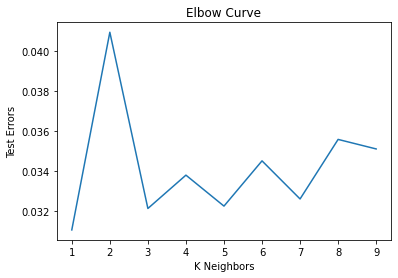

In [37]:
plt.plot(k, test)                                                        # plotting a curve for the errors while choosing K-neighbors
plt.xlabel('K Neighbors')
plt.ylabel('Test Errors')
plt.title('Elbow Curve')
plt.show()

In [38]:
m={}
for i in range(1,10):
    m[i]=np.interp(i,k,test)                                    # this is the one-dimensional linear interpolation
val=1
for j in range(1,10):
    if(val>m[j]):
        val=m[j]
        num=j

print (num, val)

1 0.031071428571428528


In [39]:
A = KNN(n_neighbors = num)
A.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=1)

In [40]:
pred = A.predict(X_test)

In [41]:
from sklearn.metrics import classification_report                           # classification report is used to measure the prediction quality
print(classification_report(Y_test, pred)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       817
           1       0.97      0.99      0.98       974
           2       0.99      0.96      0.97       819
           3       0.97      0.96      0.96       896
           4       0.96      0.97      0.97       759
           5       0.96      0.96      0.96       775
           6       0.98      0.99      0.98       808
           7       0.95      0.97      0.96       853
           8       0.98      0.94      0.96       823
           9       0.95      0.95      0.95       876

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400

